In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('Customer_Segmentation.csv')

In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [6]:
# Display the first 5 rows of the DataFrame
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [31]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [19]:
# Step 1: Handling Missing Values
# Check for missing values
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [14]:
df.shape

(8636, 18)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(8636, 18)

In [18]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [22]:
# Check for duplicate rows
df.duplicated().sum()

0

In [23]:
# Reset index after dropping missing values
df.reset_index(drop=True, inplace=True)

In [24]:
df.shape

(8636, 18)

In [25]:
df.index

RangeIndex(start=0, stop=8636, step=1)

In [35]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [36]:
#Popular products based on purchase frequency
popular_products = df['PURCHASES'].value_counts().head(10)
print(popular_products)

PURCHASES
0.00       1967
45.65        25
150.00       15
60.00        13
200.00       12
450.00       12
100.00       12
600.00       10
70.00        10
1000.00       9
Name: count, dtype: int64


In [40]:
# Customer Segmentation
# Assuming we are using 'BALANCE', 'PURCHASES_FREQUENCY', and 'CASH_ADVANCE' for segmentation
X = df[['BALANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
# Choose the number of clusters (K)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

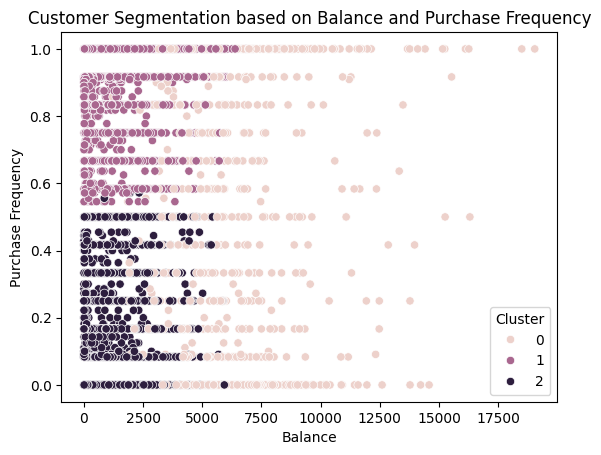

In [42]:
# Visualization
sns.scatterplot(data=df, x='BALANCE', y='PURCHASES_FREQUENCY', hue='Cluster')
plt.title('Customer Segmentation based on Balance and Purchase Frequency')
plt.xlabel('Balance')
plt.ylabel('Purchase Frequency')
plt.show()

In [43]:
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['BALANCE', 'PURCHASES_FREQUENCY', 'CASH_ADVANCE'])
print(cluster_centers_df)

    BALANCE  PURCHASES_FREQUENCY  CASH_ADVANCE
0  2.071508            -0.304202      1.863811
1 -0.289608             0.979479     -0.345351
2 -0.228019            -0.847139     -0.125474


In [44]:
# Interpretation of clusters based on cluster centroids
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} Centroid:")
    print(cluster_centers_df.iloc[i])
    print()

Cluster 1 Centroid:
BALANCE                2.071508
PURCHASES_FREQUENCY   -0.304202
CASH_ADVANCE           1.863811
Name: 0, dtype: float64

Cluster 2 Centroid:
BALANCE               -0.289608
PURCHASES_FREQUENCY    0.979479
CASH_ADVANCE          -0.345351
Name: 1, dtype: float64

Cluster 3 Centroid:
BALANCE               -0.228019
PURCHASES_FREQUENCY   -0.847139
CASH_ADVANCE          -0.125474
Name: 2, dtype: float64



In [46]:
# Assuming demographic columns are 'CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
# 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
# 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
# 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'
segment_profiles = df.groupby('Cluster').agg({
    'CUST_ID': 'count',
    'BALANCE': 'mean',
    'BALANCE_FREQUENCY': 'mean',
    'PURCHASES': 'mean',
    'ONEOFF_PURCHASES': 'mean',
    'INSTALLMENTS_PURCHASES': 'mean',
    'CASH_ADVANCE': 'mean',
    'PURCHASES_FREQUENCY': 'mean',
    'ONEOFF_PURCHASES_FREQUENCY': 'mean',
    'PURCHASES_INSTALLMENTS_FREQUENCY': 'mean',
    'CASH_ADVANCE_FREQUENCY': 'mean',
    'CASH_ADVANCE_TRX': 'mean',
    'PURCHASES_TRX': 'mean',
    'CREDIT_LIMIT': 'mean',
    'PAYMENTS': 'mean',
    'MINIMUM_PAYMENTS': 'mean',
    'PRC_FULL_PAYMENT': 'mean',
    'TENURE': 'mean'
}).rename(columns={'CUST_ID': 'Customer Count'}).reset_index()

print(segment_profiles)

   Cluster  Customer Count      BALANCE  BALANCE_FREQUENCY    PURCHASES  \
0        0             956  5941.965923           0.975499  1327.855031   
1        1            3721   994.364876           0.945836  1720.841747   
2        2            3959  1123.421836           0.827858   298.804089   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
0        837.119121              490.805941   4947.944144   
1        953.568181              767.755501    261.569727   
2        221.120419               77.892410    728.003097   

   PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
0             0.373939                    0.193530   
1             0.889015                    0.342663   
2             0.156086                    0.080365   

   PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  \
0                          0.267784                0.410378         12.383891   
1                          0.708048                0.056513          1.2192

In [49]:
# Calculate average purchase amounts for each segment
average_purchase_amounts = df.groupby('Cluster')['PURCHASES'].mean()
print("Average Purchase Amounts by Segment:")
print(average_purchase_amounts)

Average Purchase Amounts by Segment:
Cluster
0    1327.855031
1    1720.841747
2     298.804089
Name: PURCHASES, dtype: float64


In [51]:
# 1. Segment Insights: Compare average purchase amounts with other segment characteristics
# Example: Compare with purchase frequency
average_purchase_frequency = df.groupby('Cluster')['PURCHASES_FREQUENCY'].mean()
print("\nAverage Purchase Frequency by Segment:")
print(average_purchase_frequency)



Average Purchase Frequency by Segment:
Cluster
0    0.373939
1    0.889015
2    0.156086
Name: PURCHASES_FREQUENCY, dtype: float64


In [52]:
# 2. Targeted Marketing: Develop strategies based on average purchase amounts
# Example: Identify segments for premium product offerings
high_purchase_segments = average_purchase_amounts[average_purchase_amounts > 1000].index
low_purchase_segments = average_purchase_amounts[average_purchase_amounts < 500].index
print("\nHigh Purchase Amount Segments:", high_purchase_segments)
print("Low Purchase Amount Segments:", low_purchase_segments)


High Purchase Amount Segments: Index([0, 1], dtype='int32', name='Cluster')
Low Purchase Amount Segments: Index([2], dtype='int32', name='Cluster')


In [53]:
# 3. Customer Experience Enhancement: Identify areas for improvement based on segments
# Example: Identify segments with lower purchase amounts for targeted improvements
low_purchase_segments_details = df[df['Cluster'].isin(low_purchase_segments)]
print("\nDetails of Low Purchase Amount Segments:")
print(low_purchase_segments_details.head())



Details of Low Purchase Amount Segments:
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0   C10001    40.900749           0.818182      95.40              0.00   
3   C10005   817.714335           1.000000      16.00             16.00   
7   C10009  1014.926473           1.000000     861.49            661.49   
8   C10010   152.225975           0.545455    1281.60           1281.60   
10  C10012   630.794744           0.818182    1492.18           1492.18   

    INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     95.4           0.0             0.166667   
3                      0.0           0.0             0.083333   
7                    200.0           0.0             0.333333   
8                      0.0           0.0             0.166667   
10                     0.0           0.0             0.250000   

    ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                     0.000000                  

In [54]:
# 4. Campaign Optimization: Tailor campaigns based on segment-specific behaviors
# Example: Adjust messaging based on purchase behavior
for segment in high_purchase_segments:
    segment_details = df[df['Cluster'] == segment]
    print(f"\nCampaign Optimization for Segment {segment}:")
    # Add code to tailor campaigns for each segment


Campaign Optimization for Segment 0:

Campaign Optimization for Segment 1:


In [55]:
# 5. Feedback Collection: Collect feedback from customers within each segment
# Example: Send surveys or conduct interviews based on segments
for segment in df['Cluster'].unique():
    segment_customers = df[df['Cluster'] == segment]['CUST_ID'].unique()
    print(f"\nFeedback Collection for Segment {segment}:")
    # Add code to collect feedback from customers in each segment


Feedback Collection for Segment 2:

Feedback Collection for Segment 0:

Feedback Collection for Segment 1:


In [56]:
# 6. Performance Monitoring: Track relevant metrics for each segment
# Example: Track conversion rates, retention rates, average order value
conversion_rates = df.groupby('Cluster')['PRC_FULL_PAYMENT'].mean()
print("\nConversion Rates by Segment:")
print(conversion_rates)


Conversion Rates by Segment:
Cluster
0    0.026929
1    0.265370
2    0.091579
Name: PRC_FULL_PAYMENT, dtype: float64
